# Linked List Cycle

Given `head`, the head of a linked list, determine if the linked list has a cycle in it.   

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the `next` pointer. Internally, `pos` is used to denote the index of the node that tail's `next` pointer is connected to. Note that `pos` is not passed as a parameter. 

Return `true` if there is a cycle in the linked list. Otherwise, return `false`.

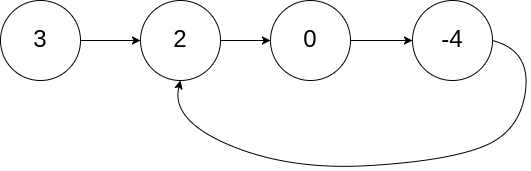

```
Input: head = [3, 2, 0, -4], pos = 1
Output: true
Explanation: There is a cycle in the linked list, where the tail connects to the 1st node (0-indexed).   
```     

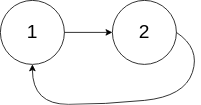

```
Input: head = [1, 2], pos = 0
Output: true
Explanation: there is a cycle in the linked list, where the tail connects to the 0th node.
```

In [13]:
# Create a linked list. 
class LinkedNode():
    def __init__(self, val, next=None):
        self.val = val
        self.next = next
        
def createLinkedListFromArray(arr:list):
    # Define the head, the starting point of the linked list. 
    head = LinkedNode(arr[0])
    curr = head
    
    # Loop through all the elements of the list and create a node for each element. 
    for el in arr[1:]:
        curr.next = LinkedNode(el)
        curr = curr.next
    
    # Returning the head of the linked list. 
    return head

array1 = [3, 2, 0, -4]
array2 = [1, 2]

ll1 = createLinkedListFromArray(array1)
ll2 = createLinkedListFromArray(array2)

# Check if the linked list has been correctly created by looping through it.
print('Non cycled Linked List')
curr = ll1
while curr != None:
    print(curr.val)
    curr = curr.next
  
#######################################################################
# In order to create a loop into the linked list, at the pos position. 

def createCycleLinkedList(head: LinkedNode, pos:int):
    # create a list containing all the nodes of the linked list and the 
    linked_node_list = []
    
    curr = head
    
    while curr.next != None:
        linked_node_list.append(curr)
        curr = curr.next
    
    # When reaching the last node of the link, set its next to point toward the node in the pos position. 
    curr.next = linked_node_list[pos]
    
    return head

cycle_linked_list1 = createCycleLinkedList(ll1, 1)

# Loop through the cycled linked list for 10 times. 
print()
print('Cycle Linked List')
i = 0
curr = cycle_linked_list1
while i < 10:
    print(curr.val)
    curr = curr.next
    i += 1


Non cycled Linked List
3
2
0
-4

Cycle Linked List
3
2
0
-4
2
0
-4
2
0
-4


In [26]:
# Now we can create a single Function which will create a cycle linked list given the array with the values and the position in which the ll has to cycle
class LinkedNode:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

def createCycleLinkedListFromArray(arr:list, pos:int):
    # The head of the array will be the 1st (0-index) value of the array.
    head = LinkedNode(arr[0])
    curr = head
    
    linked_node_list = []
    linked_node_list.append(curr)
    
    for i, el in enumerate(arr[1:]):
        # The current next node will point toward the next element (that will be "converted" as a node) in the array.
        curr.next = LinkedNode(el)
        # Store the Linked nodes in a list, so that when we reach the last element of the list, we can connect (cycle) it to the element in the correct pos
        linked_node_list.append(curr)        
        # Move the current linked node. 
        curr = curr.next
        # If we have reached the last element of the array, we connect it to the linked node in the pos position. 
        if i + 1 == len(arr) - 1:
            curr.next = linked_node_list[pos]
    
    # Return the cycle linked list
    return head

cycle_linked_list1 = createCycleLinkedListFromArray([3, 2, 0, -4], 1)

# Check if the linked list has been correctly created by looping 10 times in it. 
curr = cycle_linked_list1
i = 0
while i < 10:
    print(curr.val)
    curr = curr.next
    i += 1

3
2
0
-4
3
2
0
-4
3
2


## Solution 

To detect a cycle in a linked list, we'll use the *Floyd's Cycle Finding Algorithm*, also known as the "Tortoise and hare" algorithm. 

We'll use two pointers: a slow pointer and a fast pointer. The slow pointer moves one step at a time, while the fast pointer moves two steps. 

The main idea is that if there's a cycle, the fast pointer will catch up to the slow pointer. If there's no cycle, the fast pointer will reach the end of the list. 

The time complexity of this solution is **O(n)**, where `n` is the number of nodes in the linked list. 

In [27]:
def hasCycle(head):
    # Handle empty list or single node
    if not head or not head.next:
        return False
    
    # Initialize slow and fast pointer
    slow = head
    fast = head.next
    
    # Move pointers until they meet or fast reaches the end.
    while slow != fast:
        # If the fast pointer reaches end, no cycle exists.
        if not fast or not fast.next:
            return False
        
        # Move slow one step and fast two steps
        slow = slow.next
        fast = fast.next.next
        
    # If we exit the loop, pointers have met
    return True

In [28]:
linked_list = createLinkedListFromArray([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])
cycle_linked_list = createCycleLinkedListFromArray([9, 8, 7, 6, 5, 4, 3, 2, 1, 0], 5)

print("Cycle LinkedList: ", hasCycle(linked_list))
print("Cycle LinkedList: ", hasCycle(cycle_linked_list))

Cycle LinkedList:  False
Cycle LinkedList:  True
